# Creating a Polarized Mie Scattering Table

This notebook demonstrates how to create a Mie scattering table using src/polarized/make_mie_table.f90. 

The source Fortran code was created by Frank Evans and it is part of the SHDOM package: http://nit.colorado.edu/shdom.html

The python wrapper was created by Aviad Levis, Technion inst. of Technology 2019: https://github.com/aviadlevis/pyshdom

In [7]:
"""
Imports necessary for this notebook
"""
import os 
import numpy as np
import matplotlib.pyplot as plt
import shdom

In [2]:
"""
Create a polarized monodisperse Mie scattering table for a set wavelength as a function of radius.
This table can be integrated for Polydisperse Mie scattering as a function of the size-distribution parameters.

Note: 
Running this cell for max_integration_radius=65 takes ~50secs
"""
mie_mono = shdom.MieMonodisperse(particle_type='Water')
mie_mono.set_wavelength_integration(wavelength_band=(0.8, 0.8))   
mie_mono.set_radius_integration(minimum_effective_radius=5.0, max_integration_radius=65)

mie_mono.compute_table()

In [3]:
""" 
Create a directory (if doesnt exist) and write the Mie table, that was created 
in the previous cell, for for later use.
"""
directory = '../mie_tables/monodisperse/'

# safe creation of the directory
if not os.path.exists(directory):
    os.makedirs(directory)
output_path = os.path.join(directory, 'Water_800nm.scatpol')
    
mie_mono.write_table(output_path)

Writing Mie monodisperse table to file: ../mie_tables/monodisperse/Water_800nm.scatpol


In [5]:
"""
Compute Polydisperse scattering for multiple size-distributions and save a polydisperse table
"""
size_distribution = shdom.SizeDistribution(type='gamma')
size_distribution.set_parameters(reff=np.linspace(4.0, 25.0, 50), veff=np.linspace(0.01, 0.2, 50))
size_distribution.compute_nd(radii=mie_mono.radii, particle_density=mie_mono.pardens)


mie_poly = shdom.MiePolydisperse(mie_mono, size_distribution)
mie_poly.compute_table()

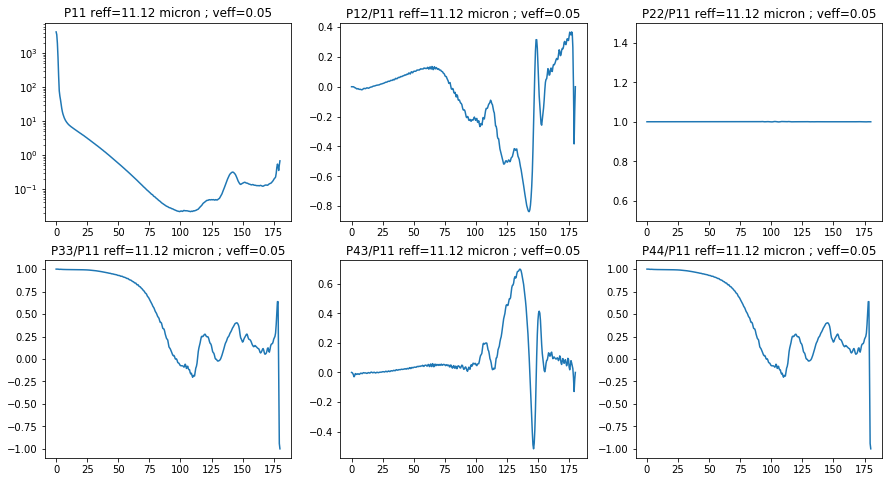

In [5]:
"""
Convert wigner coefficients into a scattering phase function matrix and plot all components
See Figure 2 of the IPRT comparison project: https://arxiv.org/pdf/1901.01813.pdf
"""
plot_re, plot_ve = 11.12, 0.05
angles = np.linspace(0,180, 360)
phase = []
for i in range(1,7):
    phase.append(mie_poly.get_angular_scattering(plot_re, plot_ve, angles, phase_element=i))
    
%matplotlib inline
f, axes = plt.subplots(2, 3, figsize=(15,8));
axes[0, 0].semilogy(angles, phase[0]);
axes[0, 0].set_title('P11 reff={:1.2f} micron ; veff={:1.2f}'.format(plot_re, plot_ve));
axes[0, 1].plot(angles, phase[4]/phase[0]);
axes[0, 1].set_title('P12/P11 reff={:1.2f} micron ; veff={:1.2f}'.format(plot_re, plot_ve));
axes[0, 2].plot(angles, phase[1]/phase[0]);
axes[0, 2].set_title('P22/P11 reff={:1.2f} micron ; veff={:1.2f}'.format(plot_re, plot_ve));
axes[0, 2].set_ylim([0.5,1.5]);
axes[1, 0].plot(angles, phase[3]/phase[0]);
axes[1, 0].set_title('P33/P11 reff={:1.2f} micron ; veff={:1.2f}'.format(plot_re, plot_ve));
axes[1, 1].plot(angles, phase[5]/phase[0]);
axes[1, 1].set_title('P43/P11 reff={:1.2f} micron ; veff={:1.2f}'.format(plot_re, plot_ve));
axes[1, 2].plot(angles, phase[2]/phase[0]);
axes[1, 2].set_title('P44/P11 reff={:1.2f} micron ; veff={:1.2f}'.format(plot_re, plot_ve));

In [6]:
""" 
Create a directory (if doesnt exist) and write the Mie table, that was created 
in the previous cell, for for later use.
"""
directory = '../mie_tables/polydisperse/' 

# safe creation of the directory
if not os.path.exists(directory):
    os.makedirs(directory)
output_path = os.path.join(directory, 'Water_800nm.scatpol')
    
mie_poly.write_table(output_path)

Writing mie table to file: ../mie_tables/polydisperse/Water_800nm.scatpol
